# Projeto 2 - Ciência dos Dados

______________________________________________________

## Participantes:


Henrique Andrade Albuqurque 


Mateus Marinheiro 


Matheus Constante

________________________________________

## Introdução

### Tema:

   Previsão da nota média do Enem de um aluno baseado nos seguintes features:

   

### Target:
 
 - NU_NOTA_MT:

      Uma empresa junior está procurando por jovens, formados na escola que possuem o raciocínio logíco desenvolvido, além de possuirem um bom compreendimento das matérias de exatas. Desse modo, a firma possui a intenção de projetar um classificdor que preve a nota do enem de matemática de alunos, baseados em algumas características importantes para a firma. 
      
      A firma deseja contratar um novo grupo de trainees que poussuam diferentes experiencias e culturas, para assim obter no conjunto uma grande de variação de aprendizados gerais. Devido a isso, o classificador deve prever as notas de matemáticas de pessoas baseadas nas seguinte features: que sejam treineiros ou não, para ficar de olho em futuros membros; na faixa etária, pois a empresa está visando contratar jovens entre 18 e 25 anos para possuir diferentes visões de mundo, entretando não é uma obrigação ser menor que 25 anos; no sexo da pessoas para possuir um grupo misto que também possua a visão entre diferentes gêneros, e que incentive as mulheres a virem para a área de exatas; na raça, para haver uma diferença de culturas dentro do grupo, e visões sobre o preconceito no mundo atual; e por último no tipo de escola que a pessoas frenquentou, pois existe uma grande variação das experinêcias obtidas pelos alunos de escolas públicas e privadas.


### Features: 

 - TP_FAIXA_ETARIA:
   - Faixa Etária dos participantes
      - 1- Menor de 17 anos
      - 2- 17 anos
      - 3- 18 anos
      - 4- 19 anos
      - 5- 20 anos
      - 6- 21 anos
      - 7- 22 anos
      - 8- 23 anos
      - 9- 24 anos
      - 10- 25 anos
      - 11- Entre 26 e 30 anos
      - 12- Entre 31 e 35 anos
      - 13- Entre 36 e 40 anos
      - 14- Entre 41 e 45 anos
      - 15- Entre 46 e 50 anos
      - 16- Entre 51 e 55 anos
      - 17- Entre 56 e 60 anos
      - 18- Entre 61 e 65 anos
      - 19- Entre 66 e 70 anos
      - 20- Maior de 70 anos

 - TP_SEXO: 
    - Sexo do Participante
      - M - Masculino
      - F - Feminino
 - TP_COR_RAÇA:
    - Cor/Raça do participante
      - 0- Não declarado
      - 1- Branca
      - 2- Preta
      - 3- Parda
      - 4- Amarela
      - 5- Indígina
      - 6- Não dispõe da informação
 - IN_TREINEIRO:
    - Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos
      - 0 - Sim
      - 1 - Não
 - TP_ESCOLA:
    - Tipo de escola do Ensino Médio:
       - 1- Não respondeu
       - 2- Pública
       - 3- Privada

________

Carregando algumas bibliotecas:

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\Mateus Marinhero\Documents\Insper\2023\2o Semestre\Ciência dos Dados\Projeto2\Projeto-2-Ciencia-dos-Dados


Carregando a base de dados:

In [4]:
dados = pd.read_excel('DADOS\MICRODADOS_ENEM_2022.xlsx') # Lê o arquivo excel
dados.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,14,M,2,1,0,NaN,NaN,NaN,NaN,NaN,NaN
1,14,M,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,5,F,2,1,0,NaN,421.1,546.0,498.8,565.3,760.0
3,6,M,3,1,0,NaN,490.7,388.6,357.8,416.0,320.0
4,4,M,3,1,0,NaN,NaN,NaN,NaN,NaN,NaN


Separando colunas de Target e Features:

In [5]:
dados = dados.loc[:, ["TP_FAIXA_ETARIA", "TP_SEXO", "TP_COR_RACA", "TP_ESCOLA", "IN_TREINEIRO", "NU_NOTA_MT"]] # Seleciona as colunas que serão utilizadas como features
dados.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_MT
0,14,M,2,1,0,NaN
1,14,M,1,1,0,NaN
2,5,F,2,1,0,565.3
3,6,M,3,1,0,416.0
4,4,M,3,1,0,NaN


#### Retirando Linhas vazias da coluna Target

In [6]:
# Remover as linhas com NaN apenas na coluna 'NU_NOTA_MT'
dados = dados.dropna(subset=['NU_NOTA_MT'])
dados.head(5)


,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_MT
2,5,F,2,1,0,565.3
3,6,M,3,1,0,416.0
7,6,F,2,1,0,404.9
9,4,F,3,1,0,435.3
11,2,F,1,3,0,456.8


### Classificando Variáveis genéricas

In [7]:
# Mudando o nome das variáveis da coluna TP_FAIXA_ETARIA

novas_categorias = {1 : '< 17', 2 : '17', 2 : '18', 3 : '19', 4 : '20', 5 : '21', 6 : '22', 7 : '23', 8 : '24', 9 : '25', 10 : '26-30', 11 : '31-35', 12 : '36-40', 13 : '41-45', 14 : '46-50', 15 : '51-55', 16 : '56-60', 17 : '61-65', 18 : '66-70', 19 : '71-75', 20 : '70 >'}
dados['TP_FAIXA_ETARIA'] = dados['TP_FAIXA_ETARIA'].astype('category').cat.rename_categories(novas_categorias)

# Muda o nome das variáveis da coluna TP_COR_RACA]

novas_categorias = {0 : 'Não declarado', 1 : 'Branca', 2 : 'Preta', 3 : 'Parda', 4 : 'Amarela', 5 : 'Indígena', 6 : 'Não dispõe da informação'}
dados['TP_COR_RACA'] = dados['TP_COR_RACA'].astype('category').cat.rename_categories(novas_categorias)

# Muda o nome das variáveis da coluna TP_ESCOLA

novas_categorias = {1 : 'Não respondeu', 2 : 'Pública', 3 : 'Privada'}
dados['TP_ESCOLA'] = dados['TP_ESCOLA'].astype('category').cat.rename_categories(novas_categorias)

# Muda o nome das variáveis da coluna IN_TREINEIRO

novas_categorias = {0 : 'Sim', 1 : 'Não'}
dados['IN_TREINEIRO'] = dados['IN_TREINEIRO'].astype('category').cat.rename_categories(novas_categorias)

# Muda o nome das variáveis da coluna TP_SEXO

novas_categorias = {'M' : 'Masculino', 'F' : 'Feminino'}
dados['TP_SEXO'] = dados['TP_SEXO'].astype('category').cat.rename_categories(novas_categorias)



#### Análise descritiva detalhada das variáveis


- Faixa Etária x Notas de Matemática

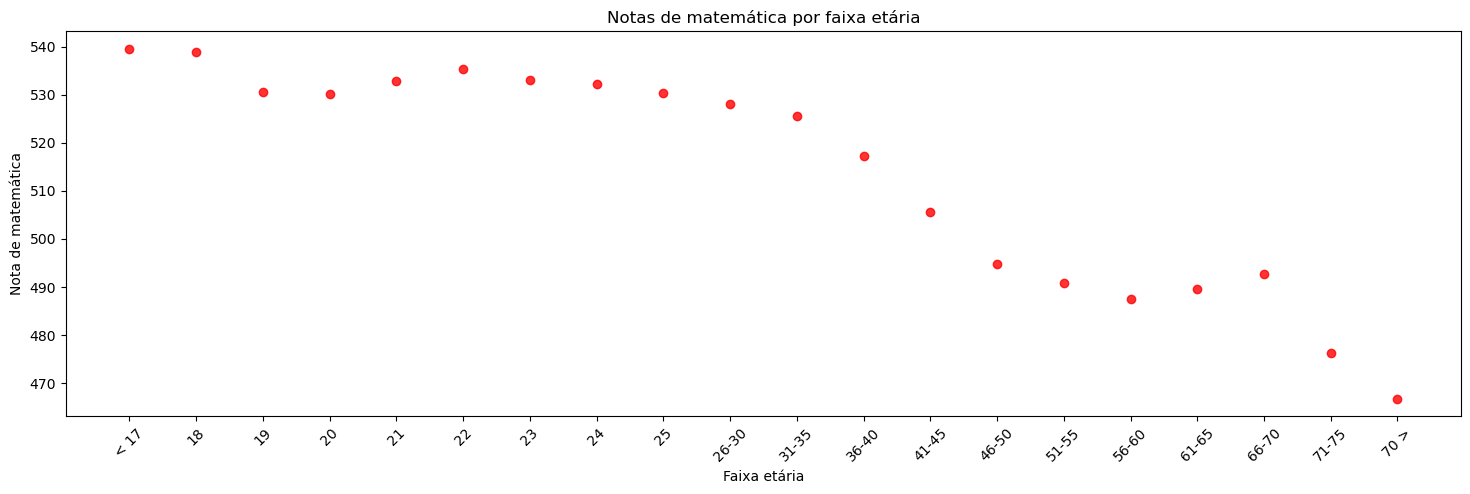

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Supondo que 'dados' seja o DataFrame que contém suas notas e faixas etárias

# Médias das notas de matemática por faixa etária
y = dados.groupby(['TP_FAIXA_ETARIA']).NU_NOTA_MT.mean()

# Criando um array com os índices para o eixo x
x = np.arange(len(y))

# Gráfico de dispersão das notas de matemática por faixa etária
fig = plt.figure(figsize=(18, 5))
plt.scatter(x, y, c='red', alpha=0.8)

# Configurando os ticks do eixo x
plt.xticks(x, labels=y.index, rotation=45)

plt.title('Notas de matemática por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Nota de matemática')
plt.show()


- Gráfico da média de notas por faixa etária

O gráfico acima ilustra a média das notas em relação às diferentes faixas etárias. Optamos por esse formato de gráfico com médias, uma vez que a inclusão de todas as notas tornaria a representação demasiadamente poluída. Quanto ao uso de um histograma, devido à quantidade significativa de dados (20 conjuntos), poderia gerar certa confusão na interpretação.

É possível observar uma influência da faixa etária nas notas de Matemática. Essa influência não é integral, porém evidencia-se que, em média, as notas tendem a diminuir conforme a faixa etária aumenta.

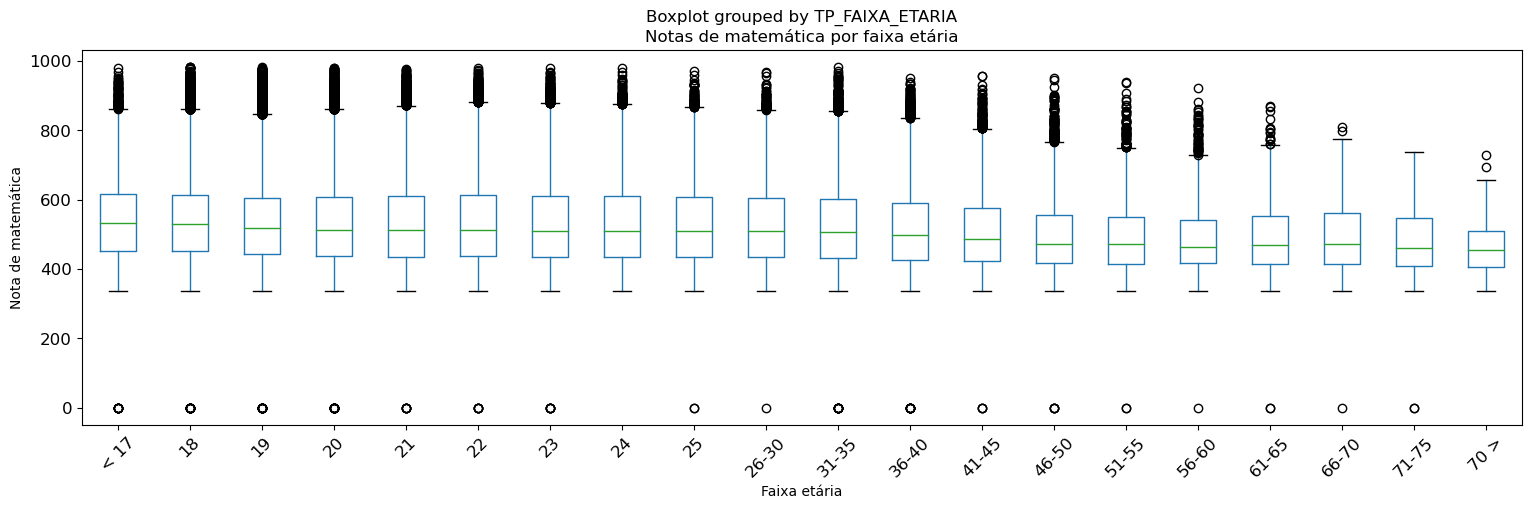

In [9]:
dados.boxplot(column='NU_NOTA_MT', by='TP_FAIXA_ETARIA', figsize=(18, 5), grid=False, fontsize=12, rot=45)
plt.title('Notas de matemática por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Nota de matemática')
plt.show()



- Gráfico boxplot notas de matemática por faixa etária

O gráfico boxplot mostra as notas de matemática em diferentes faixas etárias. Ele indica que, em geral, à medida que os alunos ficam mais velhos, suas notas tendem a diminuir. Além disso, os "retângulos" no gráfico (representando os quartis) se tornam menores à medida que a idade aumenta, sugerindo que a variação nas notas é menor em idades mais altas. Isso significa que as notas dos alunos nesses grupos de idade são mais consistentes, com menos diferenças entre elas, em comparação com os grupos mais jovens.

- Sexo x Nota de Matemática

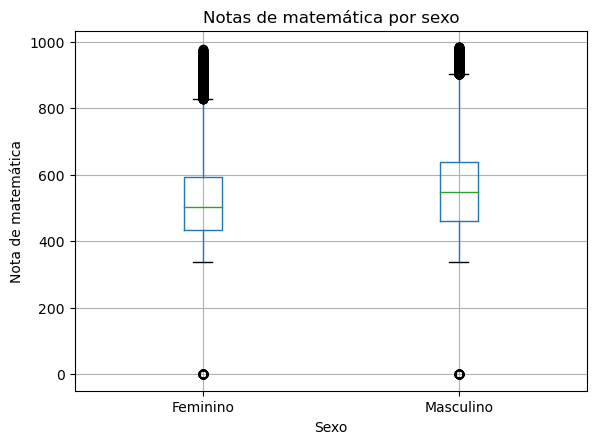

In [10]:
# Boxplot das notas de matemática por sexo sem outliers
dados.boxplot(column='NU_NOTA_MT', by='TP_SEXO')
plt.title('Notas de matemática por sexo')
plt.suptitle('')
plt.xlabel('Sexo')
plt.ylabel('Nota de matemática')
plt.show()



- Gráfico notas de matemática por sexo

Ao interpretar o gráfico boxplot das notas de Matemática, observamos que o grupo masculino apresenta uma caixa mais alta e uma mediana mais elevada em relação ao grupo feminino. Isso sugere que, em média, os homens tendem a ter um desempenho superior nessa disciplina quando comparados com as mulheres. Essas diferenças são indicadas pela posição mais alta da mediana e da própria caixa no gráfico, denotando um desempenho médio mais elevado no grupo masculino em relação ao grupo feminino no contexto das notas de Matemática.

- Cor/Raça x Notas de Matemática

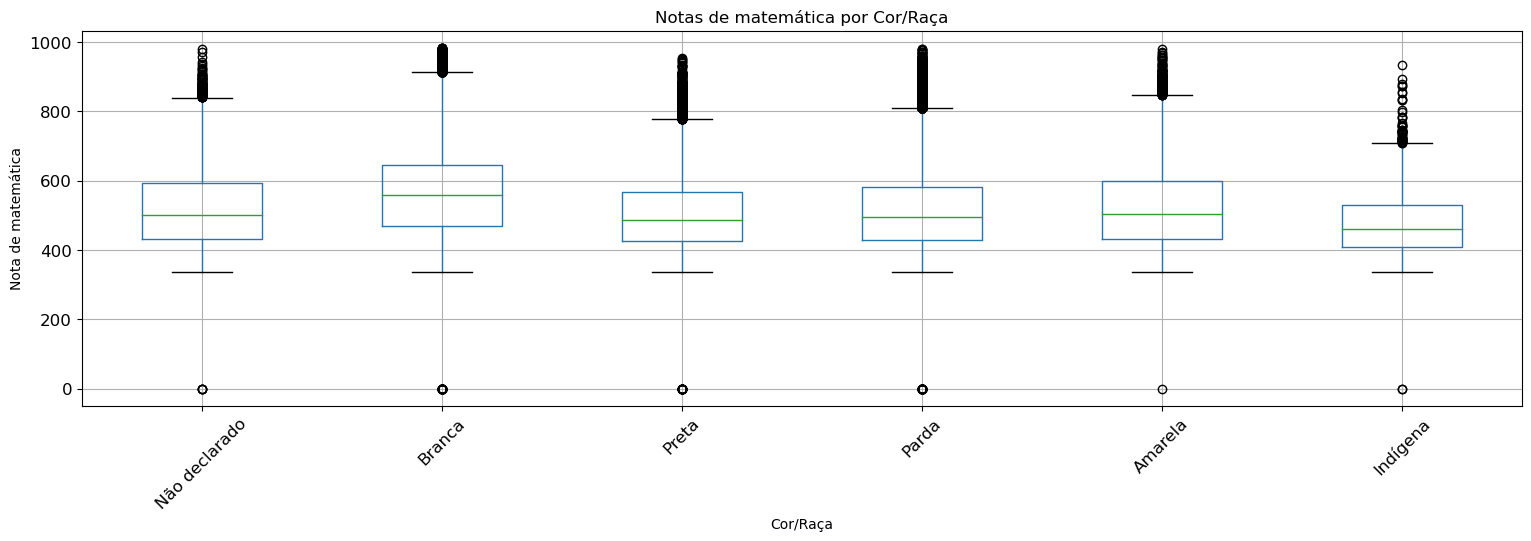

In [11]:
# Boxplot das notas de matemática por sexo sem outliers
dados.boxplot(column='NU_NOTA_MT', by='TP_COR_RACA', figsize=(18, 5), grid=False, fontsize=12, rot=45)
plt.title('Notas de matemática por Cor/Raça')
plt.suptitle('')
plt.xlabel('Cor/Raça')
plt.ylabel('Nota de matemática')
plt.grid()
plt.show()



- Gráfico notas de matemática por cor/raça 

Branca: Esta raça/cor possui a maior mediana, evidenciada pelo quadrado mais alto no gráfico, indicando um desempenho superior em relação às outras categorias.

Amarelos e Não Declarados: Apresentam uma mediana intermediária, ficando em segundo lugar no desempenho acadêmico em comparação com os brancos. Embora não alcancem a média mais alta, estão acima das outras categorias.

Pretos e Pardos: Essas raças/cores ficam em terceiro lugar em termos de mediana, indicando um desempenho menor em comparação com brancos, amarelos e não declarados.

Indígenas: Apresentam a menor mediana dentre todas as raças/cores analisadas, sugerindo um desempenho acadêmico mais baixo em relação às outras categorias mencionadas no gráfico Box Plot.

Essa análise das mediana das raças/cores evidencia uma disparidade nos resultados acadêmicos, sugerindo diferenças de desempenho entre os grupos. É importante notar que a interpretação desses dados deve ser feita com cautela, considerando fatores sociais, econômicos e estruturais que podem influenciar esses resultados.

 - Tipo de Escola x Nota de Matemática

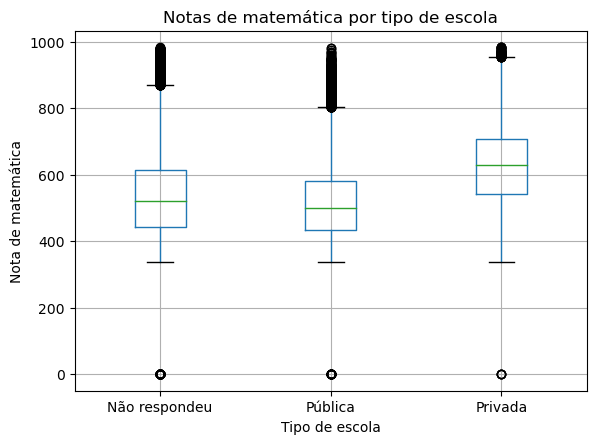

In [12]:
# box plot das notas de matemática por tipo de escola
dados.boxplot(column='NU_NOTA_MT', by='TP_ESCOLA')
plt.title('Notas de matemática por tipo de escola')
plt.suptitle('')
plt.xlabel('Tipo de escola')
plt.ylabel('Nota de matemática')
plt.show()


- Gráfico boxplot notas de matemática por tipo de escola

Escola Privada: Apresenta um desempenho muito superior em relação às outras categorias. Possui uma mediana significativamente mais alta em comparação com as demais escolas, representadas pelas pessoas que não responderam e, em especial, em relação às escolas públicas.

Pessoas que não Responderam: Possuem um desempenho intermediário em relação às diferentes categorias de escolas. No entanto, quando comparadas especificamente com o desempenho das escolas particulares, possuem um desempenho inferior e um desempenho superior as escolas publicas.

Escola Pública: Apresenta um desempenho significativamente inferior em relação às escolas privadas e em relação às pessoas que não responderam. Isso sugere que, em média, as escolas públicas têm um desempenho menor comparado as demais.

Essa análise ressalta uma disparidade no desempenho entre os tipos de escolas. É importante considerar diversos fatores, como investimento, estrutura educacional, qualidade de ensino e recursos disponíveis em cada tipo de instituição, ao interpretar esses dados.

 - Treineiro/Não treineiro x Nota de Matemática

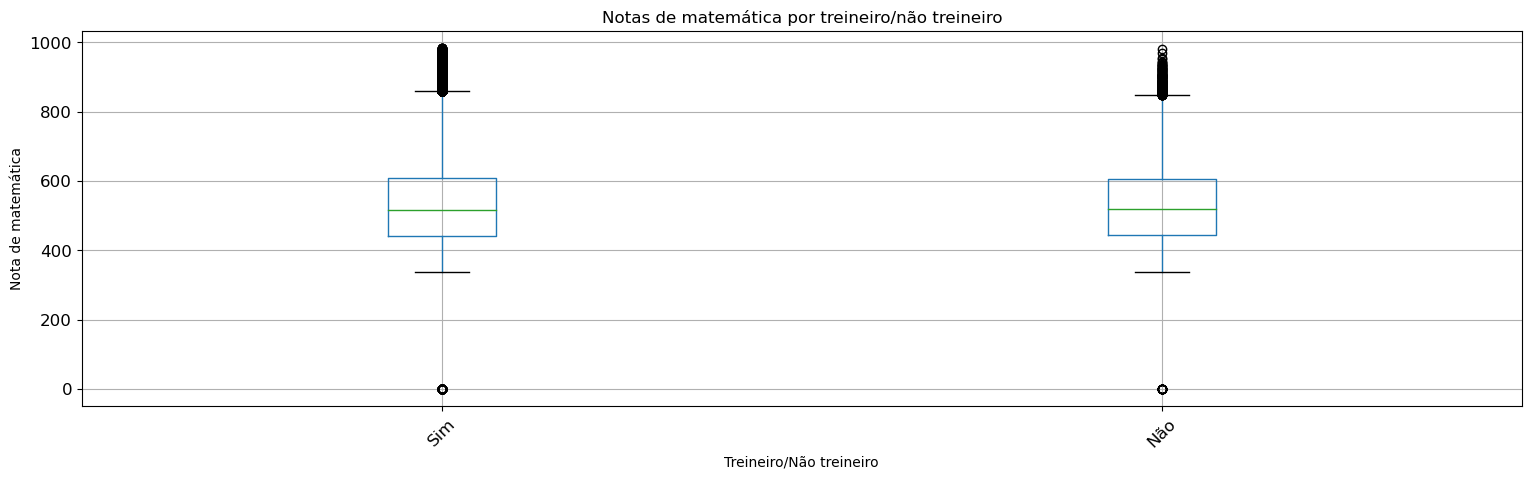

In [13]:
# box plot das notas de matemática por treineiro/nao treineiro

dados.boxplot(column='NU_NOTA_MT', by='IN_TREINEIRO', figsize=(18, 5), grid=False, fontsize=12, rot=45)
plt.title('Notas de matemática por treineiro/não treineiro')
plt.suptitle('')
plt.xlabel('Treineiro/Não treineiro')
plt.ylabel('Nota de matemática')
plt.grid()
plt.show()


Os gráficos boxplot comparativos entre treineiros e não treineiros exibem medianas quase semelhantes, bem como caixas (representando os quartis) de tamanhos e posições aproximadamente iguais, isso indica uma similaridade nos desempenhos entre os dois grupos. A ausência de diferenças marcantes na posição da mediana e na extensão dos quartis sugere que tanto os treineiros quanto os não treineiros obtiveram resultados médios semelhantes na avaliação. Isso sugere que a preparação adicional realizada pelos treineiros não resultou em um desempenho significativamente distinto em relação aos não treineiros, pois a distribuição das notas ou resultados parece ser comparável entre ambos os grupos.

## Modelos de Predição

#### - Regressão Linear Múltipla

In [14]:
# PARA DEIXAR EM GRAFICO NAO EDITAVEL
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

In [15]:
### Função utilitária para fazer a regressão com constante adicionada

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [16]:
# Transformando variaveis categoricas em variaveis dummies

dados_dummies = pd.get_dummies(dados, columns=['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'IN_TREINEIRO'])
dados_dummies.head()

,NU_NOTA_MT,TP_FAIXA_ETARIA_< 17,TP_FAIXA_ETARIA_18,TP_FAIXA_ETARIA_19,TP_FAIXA_ETARIA_20,TP_FAIXA_ETARIA_21,TP_FAIXA_ETARIA_22,TP_FAIXA_ETARIA_23,TP_FAIXA_ETARIA_24,TP_FAIXA_ETARIA_25,...,TP_COR_RACA_Branca,TP_COR_RACA_Preta,TP_COR_RACA_Parda,TP_COR_RACA_Amarela,TP_COR_RACA_Indígena,TP_ESCOLA_Não respondeu,TP_ESCOLA_Pública,TP_ESCOLA_Privada,IN_TREINEIRO_Sim,IN_TREINEIRO_Não
2,565.3,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,416.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
7,404.9,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
9,435.3,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
11,456.8,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [17]:
# Descrição das variáveis

dados_dummies.describe()

,NU_NOTA_MT,TP_FAIXA_ETARIA_< 17,TP_FAIXA_ETARIA_18,TP_FAIXA_ETARIA_19,TP_FAIXA_ETARIA_20,TP_FAIXA_ETARIA_21,TP_FAIXA_ETARIA_22,TP_FAIXA_ETARIA_23,TP_FAIXA_ETARIA_24,TP_FAIXA_ETARIA_25,...,TP_COR_RACA_Branca,TP_COR_RACA_Preta,TP_COR_RACA_Parda,TP_COR_RACA_Amarela,TP_COR_RACA_Indígena,TP_ESCOLA_Não respondeu,TP_ESCOLA_Pública,TP_ESCOLA_Privada,IN_TREINEIRO_Sim,IN_TREINEIRO_Não
count,742806.000000,742806.000000,742806.000000,742806.000000,742806.000000,742806.000000,742806.000000,742806.000000,742806.000000,742806.000000,...,742806.000000,742806.000000,742806.000000,742806.000000,742806.000000,742806.000000,742806.000000,742806.000000,742806.000000,742806.000000
mean,531.928555,0.060713,0.233296,0.281158,0.131527,0.073606,0.045673,0.030728,0.021866,0.015845,...,0.386207,0.122581,0.449330,0.018893,0.005312,0.549982,0.393645,0.056373,0.892117,0.107883
std,113.575743,0.238803,0.422930,0.449565,0.337976,0.261129,0.208775,0.172580,0.146245,0.124877,...,0.486879,0.327956,0.497426,0.136148,0.072692,0.497496,0.488558,0.230640,0.310233,0.310233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,441.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,516.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,608.100000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,983.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div id="passo1"></div>

### Passo 1: Ajustando o modelo

Ajuste um modelo considerando Média de Matemática como resposta (dependente) e as demais variáveis da base de dados como explicativas!

Faça a separação das variáveis resposta e preditoras (explicativas):

Retirando colunas de faixa etária maior do que 30.

In [18]:
dados_dummies.columns

Index(['NU_NOTA_MT', 'TP_FAIXA_ETARIA_< 17', 'TP_FAIXA_ETARIA_18',
       'TP_FAIXA_ETARIA_19', 'TP_FAIXA_ETARIA_20', 'TP_FAIXA_ETARIA_21',
       'TP_FAIXA_ETARIA_22', 'TP_FAIXA_ETARIA_23', 'TP_FAIXA_ETARIA_24',
       'TP_FAIXA_ETARIA_25', 'TP_FAIXA_ETARIA_26-30', 'TP_FAIXA_ETARIA_31-35',
       'TP_FAIXA_ETARIA_36-40', 'TP_FAIXA_ETARIA_41-45',
       'TP_FAIXA_ETARIA_46-50', 'TP_FAIXA_ETARIA_51-55',
       'TP_FAIXA_ETARIA_56-60', 'TP_FAIXA_ETARIA_61-65',
       'TP_FAIXA_ETARIA_66-70', 'TP_FAIXA_ETARIA_71-75',
       'TP_FAIXA_ETARIA_70 >', 'TP_SEXO_Feminino', 'TP_SEXO_Masculino',
       'TP_COR_RACA_Não declarado', 'TP_COR_RACA_Branca', 'TP_COR_RACA_Preta',
       'TP_COR_RACA_Parda', 'TP_COR_RACA_Amarela', 'TP_COR_RACA_Indígena',
       'TP_ESCOLA_Não respondeu', 'TP_ESCOLA_Pública', 'TP_ESCOLA_Privada',
       'IN_TREINEIRO_Sim', 'IN_TREINEIRO_Não'],
      dtype='object')

In [19]:
# Retirando todas as coluna de faixa etária 30 >

# Lista das faixas etárias que você quer manter
faixas_etarias_a_manter = ['NU_NOTA_MT', 'TP_FAIXA_ETARIA_< 17', 'TP_FAIXA_ETARIA_18',
       'TP_FAIXA_ETARIA_19', 'TP_FAIXA_ETARIA_20', 'TP_FAIXA_ETARIA_21',
       'TP_FAIXA_ETARIA_22', 'TP_FAIXA_ETARIA_23', 'TP_FAIXA_ETARIA_24',
       'TP_FAIXA_ETARIA_25', 'TP_FAIXA_ETARIA_26-30', 'TP_SEXO_Feminino', 'TP_SEXO_Masculino', 'TP_COR_RACA_Não declarado', 'TP_COR_RACA_Branca', 'TP_COR_RACA_Preta',
       'TP_COR_RACA_Parda', 'TP_COR_RACA_Amarela', 'TP_COR_RACA_Indígena',
       'TP_ESCOLA_Não respondeu', 'TP_ESCOLA_Pública', 'TP_ESCOLA_Privada',
       'IN_TREINEIRO_Sim', 'IN_TREINEIRO_Não']

# Filtrando o DataFrame para manter apenas as colunas desejadas
dummies_filtrado = dados_dummies[faixas_etarias_a_manter]

dummies_filtrado.head()

,NU_NOTA_MT,TP_FAIXA_ETARIA_< 17,TP_FAIXA_ETARIA_18,TP_FAIXA_ETARIA_19,TP_FAIXA_ETARIA_20,TP_FAIXA_ETARIA_21,TP_FAIXA_ETARIA_22,TP_FAIXA_ETARIA_23,TP_FAIXA_ETARIA_24,TP_FAIXA_ETARIA_25,...,TP_COR_RACA_Branca,TP_COR_RACA_Preta,TP_COR_RACA_Parda,TP_COR_RACA_Amarela,TP_COR_RACA_Indígena,TP_ESCOLA_Não respondeu,TP_ESCOLA_Pública,TP_ESCOLA_Privada,IN_TREINEIRO_Sim,IN_TREINEIRO_Não
2,565.3,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,416.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
7,404.9,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
9,435.3,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
11,456.8,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [20]:
# Separando as variáveis entre preditoras e variável resposta

X = dummies_filtrado.drop('NU_NOTA_MT', axis=1)
Y = dummies_filtrado['NU_NOTA_MT']

In [21]:
results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     5506.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:53:15   Log-Likelihood:            -4.5180e+06
No. Observations:              742806   AIC:                         9.036e+06
Df Residuals:                  742785   BIC:                         9.036e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.114e+12   2.88e+12      0.733      0.463   -3.53e+12    7.76e+12
TP_FAIXA_ETARIA_< 17         70.0174      0.909     76.988      0.000      68.235      71.800
TP_FAIXA_ETARIA_18           58.3124      0.652     89.494      0.000      57.035      59.589
TP_FAIXA_ETARIA_19           45.3734      0.592     76.659      0.000      44.213      46.533
TP_FAIXA_ETARIA_20           26.1149      0.540     48.376      0.000      25.057      27.173
TP_FAIXA_ETARIA_21           22.7138      0.609     37.269      0.000      21.519      23.908
TP_FAIXA_ETARIA_22           22.5197      0.704     31.997      0.000      21.140      23.899
TP_FAIXA_ETARIA_23           19.5772      0.810     24.169      0.000      17.990      21.165
TP_FAIXA_ETARIA_24           19.0532      0.925     20.599      0.000      17.240      20.866
TP_FAIXA_ETARIA_25           16.3998      1.058     15.508      0.000      14.327      18.473
TP_FAIXA_ETARIA_26-30        14.2599      1.145     12.452      0.000      12.015      16.504
TP_SEXO_Feminino           1.168e+12   1.46e+12      0.800      0.424   -1.69e+12    4.03e+12
TP_SEXO_Masculino          1.168e+12   1.46e+12      0.800      0.424   -1.69e+12    4.03e+12
TP_COR_RACA_Não declarado  8.723e+10   1.78e+11      0.491      0.623   -2.61e+11    4.35e+11
TP_COR_RACA_Branca         8.723e+10   1.78e+11      0.491      0.623   -2.61e+11    4.35e+11
TP_COR_RACA_Preta          8.723e+10   1.78e+11      0.491      0.623   -2.61e+11    4.35e+11
TP_COR_RACA_Parda          8.723e+10   1.78e+11      0.491      0.623   -2.61e+11    4.35e+11
TP_COR_RACA_Amarela        8.723e+10   1.78e+11      0.491      0.623   -2.61e+11    4.35e+11
TP_COR_RACA_Indígena       8.723e+10   1.78e+11      0.491      0.623   -2.61e+11    4.35e+11
TP_ESCOLA_Não respondeu   -1.693e+13   1.97e+13     -0.860      0.390   -5.55e+13    2.16e+13
TP_ESCOLA_Pública         -1.693e+13   1.97e+13     -0.860      0.390   -5.55e+13    2.16e+13
TP_ESCOLA_Privada         -1.693e+13   1.97e+13     -0.860      0.390   -5.55e+13    2.16e+13
IN_TREINEIRO_Sim           1.356e+13   1.85e+13      0.731      0.465   -2.28e+13    4.99e+13
IN_TREINEIRO_Não           1.356e+13   1.85e+13      0.731      0.465   -2.28e+13    4.99e+13
==============================================================================
Omnibus:                    23102.714   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25336.270
Skew:                           0.452   Prob(JB):                         0.00
Kurtosis:                       3.026   Cond. No.                     2.06e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the er

___

<div id="passo2"></div>

### Passo 2: Verificando os resultados dos testes de hipótese

O que os valores contidos na coluna $P > |t|$ dizem a respeito das variáveis explicativas utilizadas no modelo ajustado?


A coluna $P > |t|$ obtida do comando `results.summary()` refere-se ao valor-*p* de cada variável explicativa utilizada para ajudar a compreender o comportamento da variável dependente `NU_NOTA_MT`, no caso do exemplo.

No caso da regressão múltipla obtida no exemplo, das seis variáveis explicativas, apenas duas se mostram relevantes para explicar a variável `NU_NOTA_MT` pois possui valor-*p* menor do que 10% (maior nível de significância usualmente adotado na prática).
Entretanto, como há muitas variáveis explicativas, o correto é utilizar algum método de seleção de variáveis. Em modelo de regressão linear, quando há suposição de erros normais, pode-se utilizar o método Stepwise. Vide alguns comentários de como fazê-lo no `Python´.

https://stackoverflow.com/questions/15433372/stepwise-regression-in-python

https://stackoverflow.com/questions/48071753/selecting-the-best-combination-of-variables-for-regression-model-based-on-reg-sc

Removendo a variável com maior valor-*p* desde que não significante, ou seja, desde que seja maior do que o nível de significância (nesse caso, $10\%$). Faça um novo ajuste de regressão sem essa primeira variável removida do modelo. 
As variáveis de cor, são não significantes.

In [22]:
# Removendo as variáveis de cor/raça

faixas_a_manter = ['NU_NOTA_MT', 'TP_FAIXA_ETARIA_< 17', 'TP_FAIXA_ETARIA_18',
       'TP_FAIXA_ETARIA_19', 'TP_FAIXA_ETARIA_20', 'TP_FAIXA_ETARIA_21',
       'TP_FAIXA_ETARIA_22', 'TP_FAIXA_ETARIA_23', 'TP_FAIXA_ETARIA_24',
       'TP_FAIXA_ETARIA_25', 'TP_FAIXA_ETARIA_26-30', 'TP_SEXO_Feminino', 'TP_SEXO_Masculino',
       'IN_TREINEIRO_Sim', 'IN_TREINEIRO_Não']

# Filtrando o DataFrame para manter apenas as colunas desejadas
dummies_filtrado2 = dummies_filtrado[faixas_etarias_a_manter]

dummies_filtrado2.head()

,NU_NOTA_MT,TP_FAIXA_ETARIA_< 17,TP_FAIXA_ETARIA_18,TP_FAIXA_ETARIA_19,TP_FAIXA_ETARIA_20,TP_FAIXA_ETARIA_21,TP_FAIXA_ETARIA_22,TP_FAIXA_ETARIA_23,TP_FAIXA_ETARIA_24,TP_FAIXA_ETARIA_25,...,TP_COR_RACA_Branca,TP_COR_RACA_Preta,TP_COR_RACA_Parda,TP_COR_RACA_Amarela,TP_COR_RACA_Indígena,TP_ESCOLA_Não respondeu,TP_ESCOLA_Pública,TP_ESCOLA_Privada,IN_TREINEIRO_Sim,IN_TREINEIRO_Não
2,565.3,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,416.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
7,404.9,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
9,435.3,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
11,456.8,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [23]:
X = dummies_filtrado2.drop('NU_NOTA_MT', axis=1)
Y = dummies_filtrado2['NU_NOTA_MT']

results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     5506.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:53:16   Log-Likelihood:            -4.5180e+06
No. Observations:              742806   AIC:                         9.036e+06
Df Residuals:                  742785   BIC:                         9.036e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.114e+12   2.88e+12      0.733      0.463   -3.53e+12    7.76e+12
TP_FAIXA_ETARIA_< 17         70.0174      0.909     76.988      0.000      68.235      71.800
TP_FAIXA_ETARIA_18           58.3124      0.652     89.494      0.000      57.035      59.589
TP_FAIXA_ETARIA_19           45.3734      0.592     76.659      0.000      44.213      46.533
TP_FAIXA_ETARIA_20           26.1149      0.540     48.376      0.000      25.057      27.173
TP_FAIXA_ETARIA_21           22.7138      0.609     37.269      0.000      21.519      23.908
TP_FAIXA_ETARIA_22           22.5197      0.704     31.997      0.000      21.140      23.899
TP_FAIXA_ETARIA_23           19.5772      0.810     24.169      0.000      17.990      21.165
TP_FAIXA_ETARIA_24           19.0532      0.925     20.599      0.000      17.240      20.866
TP_FAIXA_ETARIA_25           16.3998      1.058     15.508      0.000      14.327      18.473
TP_FAIXA_ETARIA_26-30        14.2599      1.145     12.452      0.000      12.015      16.504
TP_SEXO_Feminino           1.168e+12   1.46e+12      0.800      0.424   -1.69e+12    4.03e+12
TP_SEXO_Masculino          1.168e+12   1.46e+12      0.800      0.424   -1.69e+12    4.03e+12
TP_COR_RACA_Não declarado  8.723e+10   1.78e+11      0.491      0.623   -2.61e+11    4.35e+11
TP_COR_RACA_Branca         8.723e+10   1.78e+11      0.491      0.623   -2.61e+11    4.35e+11
TP_COR_RACA_Preta          8.723e+10   1.78e+11      0.491      0.623   -2.61e+11    4.35e+11
TP_COR_RACA_Parda          8.723e+10   1.78e+11      0.491      0.623   -2.61e+11    4.35e+11
TP_COR_RACA_Amarela        8.723e+10   1.78e+11      0.491      0.623   -2.61e+11    4.35e+11
TP_COR_RACA_Indígena       8.723e+10   1.78e+11      0.491      0.623   -2.61e+11    4.35e+11
TP_ESCOLA_Não respondeu   -1.693e+13   1.97e+13     -0.860      0.390   -5.55e+13    2.16e+13
TP_ESCOLA_Pública         -1.693e+13   1.97e+13     -0.860      0.390   -5.55e+13    2.16e+13
TP_ESCOLA_Privada         -1.693e+13   1.97e+13     -0.860      0.390   -5.55e+13    2.16e+13
IN_TREINEIRO_Sim           1.356e+13   1.85e+13      0.731      0.465   -2.28e+13    4.99e+13
IN_TREINEIRO_Não           1.356e+13   1.85e+13      0.731      0.465   -2.28e+13    4.99e+13
==============================================================================
Omnibus:                    23102.714   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25336.270
Skew:                           0.452   Prob(JB):                         0.00
Kurtosis:                       3.026   Cond. No.                     2.06e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the er

Retirando as variáveis de Sexo e Treineiro

In [24]:
# Removendo as variáveis de sexo e treineiro

faixas_a_manter = ['NU_NOTA_MT', 'TP_FAIXA_ETARIA_< 17', 'TP_FAIXA_ETARIA_18',
       'TP_FAIXA_ETARIA_19', 'TP_FAIXA_ETARIA_20', 'TP_FAIXA_ETARIA_21',
       'TP_FAIXA_ETARIA_22', 'TP_FAIXA_ETARIA_23', 'TP_FAIXA_ETARIA_24',
       'TP_FAIXA_ETARIA_25', 'TP_FAIXA_ETARIA_26-30']

# Filtrando o DataFrame para manter apenas as colunas desejadas

dummies_filtrado3 = dummies_filtrado2[faixas_a_manter]

dummies_filtrado3.head()

,NU_NOTA_MT,TP_FAIXA_ETARIA_< 17,TP_FAIXA_ETARIA_18,TP_FAIXA_ETARIA_19,TP_FAIXA_ETARIA_20,TP_FAIXA_ETARIA_21,TP_FAIXA_ETARIA_22,TP_FAIXA_ETARIA_23,TP_FAIXA_ETARIA_24,TP_FAIXA_ETARIA_25,TP_FAIXA_ETARIA_26-30
2,565.3,0,0,0,0,1,0,0,0,0,0
3,416.0,0,0,0,0,0,1,0,0,0,0
7,404.9,0,0,0,0,0,1,0,0,0,0
9,435.3,0,0,0,1,0,0,0,0,0,0
11,456.8,0,1,0,0,0,0,0,0,0,0


In [25]:
X = dummies_filtrado3.drop('NU_NOTA_MT', axis=1)
Y = dummies_filtrado3['NU_NOTA_MT']

results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     286.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:53:16   Log-Likelihood:            -4.5679e+06
No. Observations:              742806   AIC:                         9.136e+06
Df Residuals:                  742795   BIC:                         9.136e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   513.1511      0.433   1186.002      0.000     512.303     513.999
TP_FAIXA_ETARIA_< 17     26.4371      0.687     38.475      0.000      25.090      27.784
TP_FAIXA_ETARIA_18       25.8617      0.511     50.587      0.000      24.860      26.864
TP_FAIXA_ETARIA_19       17.5204      0.499     35.130      0.000      16.543      18.498
TP_FAIXA_ETARIA_20       17.0247      0.565     30.156      0.000      15.918      18.131
TP_FAIXA_ETARIA_21       19.7343      0.650     30.370      0.000      18.461      21.008
TP_FAIXA_ETARIA_22       22.2821      0.752     29.618      0.000      20.808      23.757
TP_FAIXA_ETARIA_23       19.9978      0.866     23.089      0.000      18.300      21.695
TP_FAIXA_ETARIA_24       19.1965      0.989     19.408      0.000      17.258      21.135
TP_FAIXA_ETARIA_25       17.2736      1.131     15.274      0.000      15.057      19.490
TP_FAIXA_ETARIA_26-30    14.8375      1.225     12.116      0.000      12.437      17.238
==============================================================================
Omnibus:                    39386.969   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46055.862
Skew:                           0.610   Prob(JB):                         0.00
Kurtosis:                       3.028   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Testando o Modelo

In [26]:
# Dividindo o dataset em treino e teste
from sklearn.model_selection import train_test_split

# Separando as variáveis entre preditoras e variável resposta
X = dummies_filtrado3.drop('NU_NOTA_MT', axis=1)
Y = dummies_filtrado3['NU_NOTA_MT']

from sklearn.model_selection import train_test_split

# Supondo que 'X' são suas variáveis independentes e 'y' é a variável dependente
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)




In [27]:
from sklearn.linear_model import LinearRegression

# Criar um modelo de regressão linear
model = LinearRegression()

# Treinar o modelo nos dados de treinamento
model.fit(X_train, y_train)


LinearRegression()

In [28]:
# Fazer previsões em cima dos dados de teste

y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Exemplo de cálculo de métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R²: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')

R²: 0.0037
MAE: 92.8491
MSE: 12898.9248
RMSE: 113.5734


#### - Random Forest

Importando Bibliotecas

In [30]:
from sklearn.ensemble import RandomForestClassifier  # para classificação
from sklearn.ensemble import RandomForestRegressor   # para regressão
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error


In [31]:
# Separando as variáveis entre preditoras e variável resposta

X = dummies_filtrado3.drop('NU_NOTA_MT', axis=1)
Y = dummies_filtrado3['NU_NOTA_MT']

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [32]:
# Criar um modelo de regressão linear
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [33]:
# Fazer previsões em cima dos dados de teste
y_pred = reg.predict(X_test)


In [34]:
# Avaliando o modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R²: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')

R²: 0.0037
MAE: 92.8506
MSE: 12898.9285
RMSE: 113.5734


#### - K vizinhos mais próximos

In [32]:
# Modelo dos K vizinhos mais próximos

from sklearn.neighbors import KNeighborsRegressor

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Criar um modelo de regressão linear
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)


# Fazer previsões em cima dos dados de teste
y_pred = knn.predict(X_test)


# Avaliando o modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R²: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')

NameError: name 'Y' is not defined

- Modelo de regressão linear

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Separando as variáveis entre preditoras e variável alvo
y = dados['NU_NOTA_MT']
x = dados[['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'IN_TREINEIRO']]
x = pd.get_dummies(x)

# Criando os conjuntos de dados de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

# Cria o modelo
modelo = LinearRegression()

# Treina o modelo
modelo.fit(x_treino, y_treino)

# Fazendo previsões
y_pred = modelo.predict(x_teste)

# Calculando o erro médio quadrático (MSE)
mse = mean_squared_error(y_teste, y_pred)
print('MSE:', mse)

# Calculando o RMS (Root Mean Square)
rms = np.sqrt(mse)
print('RMS:', rms)

# Calculando o R²
r2 = r2_score(y_teste, y_pred)
print('R²:', r2)


MSE: 11249.700362639149
RMS: 106.06460466451166
R²: 0.12860975215867165


## Referências:

 - https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados